In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [8]:
binary_pitchers = pd.read_csv('pitcher_subset.csv', index_col = 0)

In [9]:
binary_pitchers.columns

Index(['GameDate', 'ab', 'pitchnum', 'inning', 'teambat', 'balls', 'strikes',
       'outs', 'pitcher', 'pitcherthrows', 'batter', 'batterside',
       'pitchresult', 'pitchresult_desc', 'eventtype', 'pitchname',
       'pitchname_desc', 'spinrate', 'relspeed', 'horzbreak',
       'inducedvertbreak', 'platelocside', 'platelocheight', 'hometeam_id',
       'Home', 'awayteam_id', 'Visitor', 'venue_id', 'venue_name', 'year',
       'visscore', 'homscore', 'r1bool', 'r2bool', 'r3bool', 'pitch_type'],
      dtype='object')

In [10]:
binary_pitchers.loc[binary_pitchers['pitch_type'] == 'Fastball', 'is_fastball'] = 1.0
binary_pitchers.loc[binary_pitchers['pitch_type'] == 'Breaking Ball', 'is_fastball'] = 0.0

### Fastball Rate by Batting Count and Heatmap

In [11]:
fastball_rate_count = binary_pitchers.groupby(['balls', 'strikes'])['is_fastball'].mean().reset_index().pivot(columns='strikes', index ='balls', values='is_fastball') 

In [12]:
fastball_rate_count

strikes,0.0,1.0,2.0
balls,,,
0.0,0.612344,0.554379,0.476061
1.0,0.652781,0.560896,0.485973
2.0,0.752999,0.639314,0.515042
3.0,0.946652,0.798775,0.611629


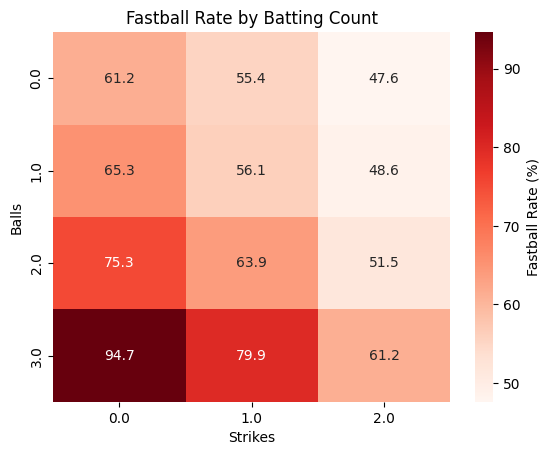

In [13]:
plt.title("Fastball Rate by Batting Count")
sns.heatmap(fastball_rate_count*100, annot=True, fmt='.1f', cmap = 'Reds', cbar_kws={'label': 'Fastball Rate (%)'})
plt.xlabel('Strikes')
plt.ylabel('Balls')
plt.show()

### Fastball Rate by # of Outs

In [15]:
fastball_outs = binary_pitchers.groupby('outs')['is_fastball'].agg(['mean', 'count']).reset_index() 

In [16]:
fastball_outs

,outs,mean,count
0,0.0,0.607233,49052
1,1.0,0.583354,49248
2,2.0,0.575517,50770


In [17]:
binary_pitchers['batting_order'] = binary_pitchers['ab'] % 9 + 1

In [18]:
binary_pitchers.groupby('batting_order')['is_fastball'].agg(['mean', 'count'])

,mean,count
batting_order,,
1,0.584768,16085
2,0.592385,16415
3,0.587814,16347
4,0.593186,16526
5,0.598796,16944
6,0.584307,16772
7,0.586373,16776
8,0.579058,16627
9,0.589999,16578


## Pitcher Characeristics

### When do our pitchers pitch?

In [19]:
innings_pitched = binary_pitchers.groupby('inning')['pitcher'].count().reset_index()

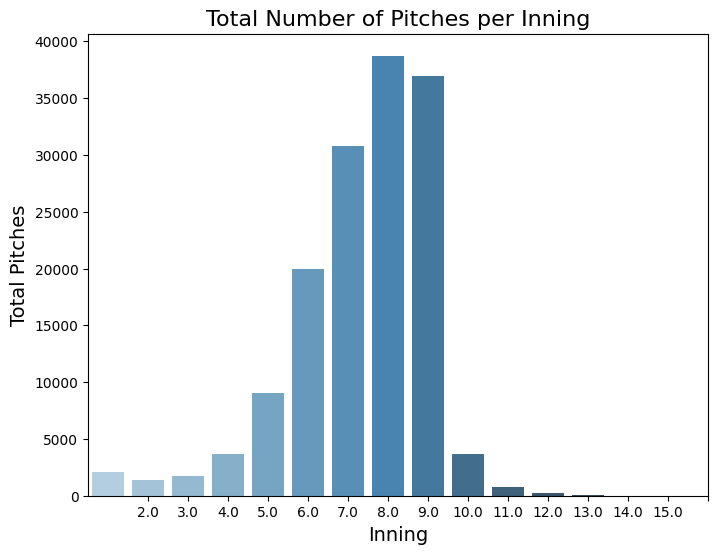

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x='inning', y='pitcher', data=innings_pitched, hue ='inning', palette="Blues_d", legend=False)

# Customize the plot
plt.title('Total Number of Pitches per Inning', fontsize=16)
plt.xlabel('Inning', fontsize=14)
plt.ylabel('Total Pitches', fontsize=14)
plt.xticks(range(1, int(innings_pitched['inning'].max()) + 1))  # Set x-ticks to display all innings

plt.show()

### Pitcher Throws vs Batter Side

In [65]:
binary_pitchers.columns

Index(['gameid', 'GameDate', 'ab', 'pitchnum', 'inning', 'teambat', 'balls',
       'strikes', 'outs', 'pitcher', 'pitcherthrows', 'batter', 'batterside',
       'pitchresult', 'pitchresult_desc', 'eventtype', 'pitchname',
       'pitchname_desc', 'spinrate', 'relspeed', 'horzbreak',
       'inducedvertbreak', 'platelocside', 'platelocheight', 'hometeam_id',
       'Home', 'awayteam_id', 'Visitor', 'venue_id', 'venue_name',
       'pitch_class', 'is_fastball', 'batting_order'],
      dtype='object')

In [21]:
pd.crosstab(binary_pitchers['pitcherthrows'], binary_pitchers['batterside'], margins=True)

batterside,L,R,All
pitcherthrows,,,
L,14990,25056,40046
R,46985,62039,109024
All,61975,87095,149070


In [22]:
binary_pitchers.groupby('pitcherthrows')['is_fastball'].mean()

pitcherthrows
L    0.630675
R    0.573066
Name: is_fastball, dtype: float64

In [23]:
binary_pitchers.groupby(['pitcherthrows', 'batterside'])['is_fastball'].mean().reset_index()

,pitcherthrows,batterside,is_fastball
0,L,L,0.593262
1,L,R,0.653057
2,R,L,0.597212
3,R,R,0.554780


### Most prominent pitchers in Dataset

In [24]:
name_counts = binary_pitchers.groupby('pitcher')['pitchnum'].count()

In [25]:
name_counts.sort_values(ascending=False)

pitcher
Clase, Emmanuel    3083
Holmes, Clay       3070
Romano, Jordan     2930
Abreu, Bryan       2917
Pallante, Andre    2892
                   ... 
Ryan, Ryder          13
Calvo, Blair         11
Turner, Justin       10
Danner, Hagen         7
Valaika, Pat          7
Name: pitchnum, Length: 212, dtype: int64

In [26]:
frequent_pitchers = name_counts[name_counts > 100].index

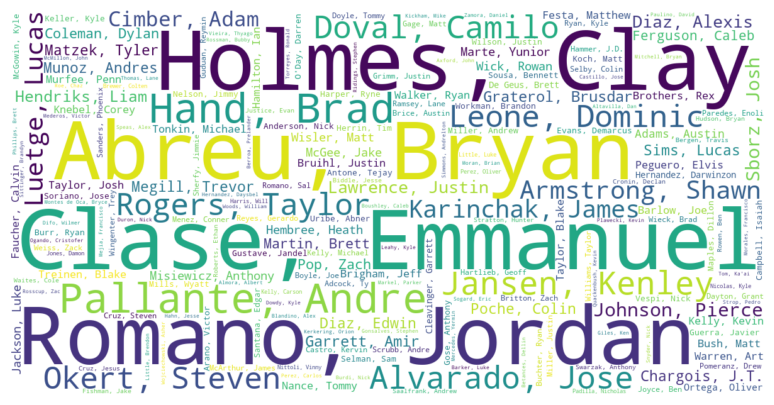

In [27]:
wordcloud = WordCloud(width=1200, height=612, background_color='white',  contour_width = 2,
     contour_color = 'black').generate_from_frequencies(name_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axis lines
plt.show()


In [28]:
big_sample_pitchers = binary_pitchers.loc[binary_pitchers['pitcher'].isin(frequent_pitchers)]

In [29]:
plot_df = big_sample_pitchers.groupby('pitcher')['is_fastball'].mean().sort_values()

In [30]:
plot_df

pitcher
Wisler, Matt        0.088542
Adams, Austin       0.125367
Harper, Ryne        0.219081
Sanders, Phoenix    0.255814
McGowin, Kyle       0.313346
                      ...   
Burr, Ryan          0.910811
Wilson, Justin      0.927052
Armstrong, Shawn    0.927244
Hudson, Bryan       0.963415
Alvarado, Jose      0.980510
Name: is_fastball, Length: 147, dtype: float64

(0.0, 1.0)

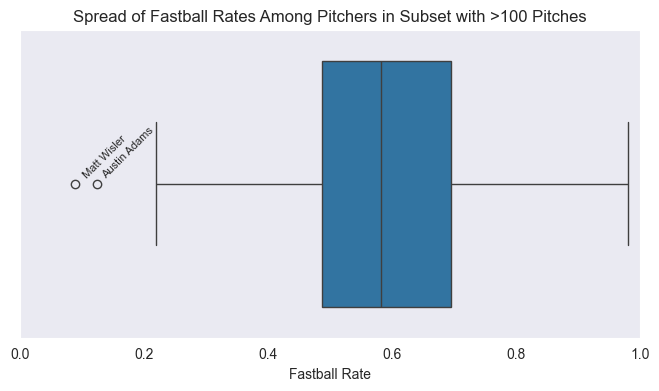

In [32]:
sns.set_style('dark')

plt.figure(figsize=(8, 4))
sns.boxplot(data=plot_df.values, orient = 'h')
plt.xlabel('Fastball Rate')
plt.title('Spread of Fastball Rates Among Pitchers in Subset with >100 Pitches')
plt.text(0.13, -0.02, "Austin Adams", size = 8, rotation=45)
plt.text(0.1, -0.02, "Matt Wisler", size = 8, rotation=45)
plt.xlim(0, 1)

In [33]:
binary_pitchers.groupby('pitch_type')['pitchname_desc'].value_counts(normalize=True)

pitch_type     pitchname_desc
Breaking Ball  Slider            0.744000
               Curveball         0.177791
               Sweeper           0.044525
               Knuckle Curve     0.032966
               Slow Curve        0.000717
Fastball       Four-seam FB      0.560661
               Sinker            0.276278
               Cutter            0.157248
               Fastball          0.005323
               Two-seam FB       0.000490
Name: proportion, dtype: float64

In [34]:
binary_pitchers['score_diff'] = np.where(binary_pitchers['teambat'] == 0, binary_pitchers['homscore'] - binary_pitchers['visscore'], binary_pitchers['visscore'] - binary_pitchers['homscore'])

In [35]:
fastball_by_score = binary_pitchers.groupby('score_diff')['is_fastball'].mean().reset_index()
mean_fastballs = binary_pitchers['is_fastball'].mean()

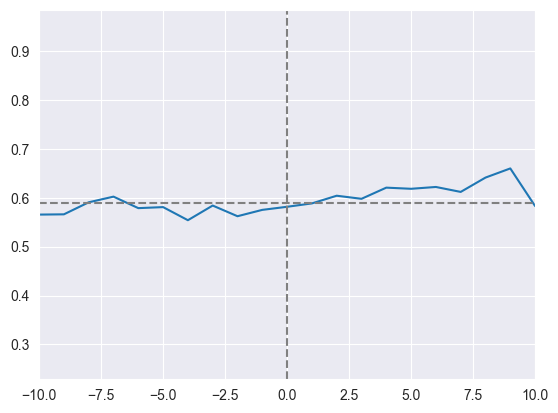

In [36]:
plt.plot(fastball_by_score['score_diff'], fastball_by_score['is_fastball'])
plt.xlim(-10, 10)
plt.axhline(y=mean_fastballs, color='gray', linestyle = '--')
plt.axvline(x=0, color='gray', linestyle='--')
plt.grid()

In [37]:
binary_pitchers.groupby(['r1bool', 'r2bool', 'r3bool'])['is_fastball'].mean()

r1bool  r2bool  r3bool
0.0     0.0     0.0       0.590759
                1.0       0.567234
        1.0     0.0       0.562605
                1.0       0.571846
1.0     0.0     0.0       0.608278
                1.0       0.558026
        1.0     0.0       0.576184
                1.0       0.601212
Name: is_fastball, dtype: float64

In [38]:
binary_pitchers = binary_pitchers.sort_values(by=['gameid', 'ab', 'pitchnum'])
binary_pitchers['pitch_of_game'] = binary_pitchers.groupby('gameid').cumcount() + 1

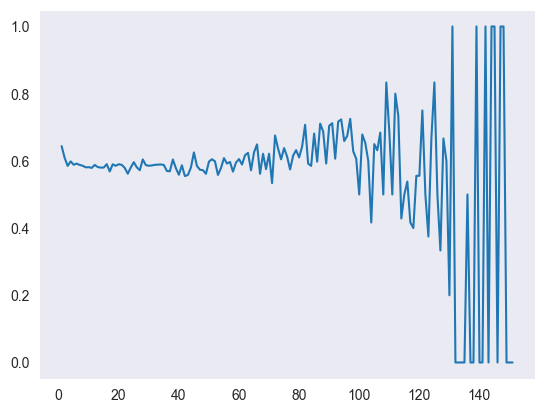

In [39]:
plt.plot(binary_pitchers.groupby('pitch_of_game')['is_fastball'].mean())

In [40]:
fastballs_by_field = binary_pitchers.groupby('venue_name')['is_fastball'].mean().reset_index()

C:\Users\johng\AppData\Local\Temp\ipykernel_30512\231871297.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fastballs_by_field.sort_values('is_fastball'), x='venue_name', y='is_fastball', palette='Set2')


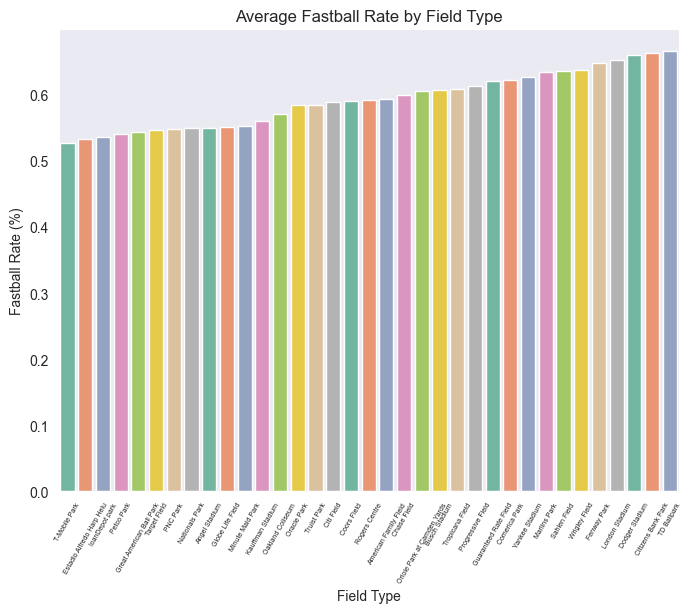

In [41]:
plt.figure(figsize=(8,6))
sns.barplot(data=fastballs_by_field.sort_values('is_fastball'), x='venue_name', y='is_fastball', palette='Set2')
plt.title('Average Fastball Rate by Field Type')
plt.xlabel('Field Type')
plt.ylabel('Fastball Rate (%)')
plt.xticks(fontsize=5, rotation=60)
plt.show()